In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dateutil
carpetas_investigacion = pd.read_csv('data/carpetas-de-investigacion-pgj-cdmx.csv', delimiter=';')
#df.drop(['A', 'B'], axis=1) para quitar columnas

---
Ahora tenemos que crear un dataframe que contenta los datos agreados por mes y año y sume la frecuencia de las incidencias

año,mes,total

In [2]:
carpetas_investigacion = carpetas_investigacion[carpetas_investigacion['año_hechos'] >= 2016]

In [3]:
carpetas_investigacion['año_hechos'].value_counts()

2018.0    248953
2017.0    225329
2016.0    194007
2019.0     93846
Name: año_hechos, dtype: int64

In [4]:
carpetas_investigacion['fecha_hechos'] = carpetas_investigacion['fecha_hechos'].apply(dateutil.parser.parse)

In [5]:
meses = {"Enero":1, "Febrero":2, "Marzo":3, "Abril":4, "Mayo":5, "Junio":6, "Julio":7, "Agosto":8, "Septiembre":9, "Octubre":10,"Noviembre":11, "Diciembre":12, }

In [6]:
carpetas_investigacion['mes_num'] = carpetas_investigacion['mes_hechos'].map(lambda x: meses[x])
valores_2016_a_2018 = carpetas_investigacion[carpetas_investigacion['año_hechos'] < 2019]

In [7]:
carpetas_investigacion = carpetas_investigacion.drop(['fiscalía', 
                         'agencia', 
                         'unidad_investigacion',
                         'fecha_inicio',
                         'mes_inicio',
                         'ao_inicio',
                         'calle_hechos',
                         'calle_hechos2',
                         'Geopoint'
                        ], axis=1)

In [8]:
carpetas_investigacion.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,longitud,latitud,Geopoint,mes_num
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,BUENOS AIRES,CUAUHTEMOC,-99.145673,19.406269,"19.406269303, -99.1456727623",6
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,CUAUHTÉMOC,CUAUHTEMOC,-99.162689,19.429468,"19.4294676006, -99.1626885107",11
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,MESA DE LOS HORNOS,TLALPAN,-99.184597,19.278135,"19.2781350645, -99.1845967763",6
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,TACUBAYA,MIGUEL HIDALGO,-99.189690,19.398010,"19.3980098652, -99.1896899072",6
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,SAN MARCOS NORTE,XOCHIMILCO,-99.114178,19.265863,"19.2658632688, -99.1141782469",3


In [9]:
agg_1 = carpetas_investigacion['fecha_hechos'].groupby(carpetas_investigacion['fecha_hechos'].dt.to_period("M")).agg('count')
agg_2 = valores_2016_a_2018['fecha_hechos'].groupby(valores_2016_a_2018['fecha_hechos'].dt.to_period("M")).agg('count')

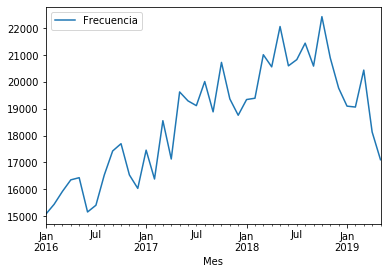

In [10]:
data = np.array([agg_1.index, agg_1])
dataset = pd.DataFrame({'Mes':data[0,:],'Frecuencia':data[1,:]})
dataset.plot(x='Mes', y='Frecuencia')

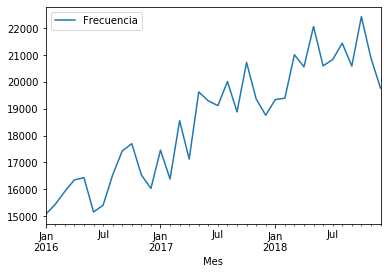

In [11]:
data_2016_2018 = np.array([agg_2.index, agg_2])
dataset_2016_2018 = pd.DataFrame({'Mes':data_2016_2018[0,:],'Frecuencia':data_2016_2018[1,:]})
dataset_2016_2018.plot(x='Mes', y='Frecuencia')


In [12]:
dataset

,Mes,Frecuencia
0,2016-01,15068
1,2016-02,15439
2,2016-03,15922
3,2016-04,16352
4,2016-05,16433
5,2016-06,15155
6,2016-07,15406
7,2016-08,16534
8,2016-09,17428
9,2016-10,17700


In [13]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [14]:
cuadrantes = gpd.read_file('cuadrantes/cuadrantes.shp')

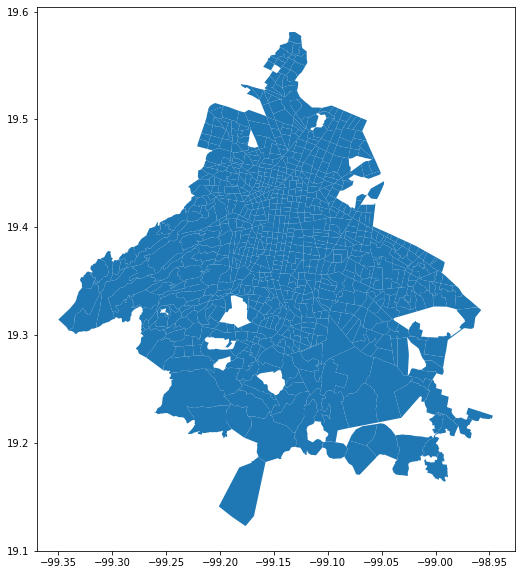

In [15]:
fig, ax = plt.subplots(figsize= (10,10))
cuadrantes.plot(ax = ax)

In [18]:
geometry = [Point(xy) for xy in zip(carpetas_investigacion['longitud'],carpetas_investigacion['latitud'])]

In [19]:
crs = {"init":"epsg:4326"}

In [20]:
geo_df = gpd.GeoDataFrame(carpetas_investigacion, geometry = geometry)
geo_df

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,longitud,latitud,Geopoint,mes_num,geometry
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,BUENOS AIRES,CUAUHTEMOC,-99.145673,19.406269,"19.406269303, -99.1456727623",6,POINT (-99.14567276228121 19.4062693030144)
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,CUAUHTÉMOC,CUAUHTEMOC,-99.162689,19.429468,"19.4294676006, -99.1626885107",11,POINT (-99.16268851074899 19.4294676005972)
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,MESA DE LOS HORNOS,TLALPAN,-99.184597,19.278135,"19.2781350645, -99.1845967763",6,POINT (-99.18459677634321 19.2781350644817)
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,TACUBAYA,MIGUEL HIDALGO,-99.189690,19.398010,"19.3980098652, -99.1896899072",6,POINT (-99.189689907207 19.3980098652279)
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,SAN MARCOS NORTE,XOCHIMILCO,-99.114178,19.265863,"19.2658632688, -99.1141782469",3,POINT (-99.11417824693741 19.2658632688123)
5,2017.0,Junio,2017-06-16 02:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,ISIDRO FABELA,TLALPAN,-99.176686,19.303028,"19.3030281171, -99.1766860005",6,POINT (-99.1766860004611 19.3030281171132)
6,2017.0,Junio,2017-06-19 13:22:00,"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COME...",DELITO DE BAJO IMPACTO,MOCTEZUMA 2A SECCIÓN,VENUSTIANO CARRANZA,-99.104402,19.430180,"19.4301803453, -99.1044015884",6,POINT (-99.10440158840342 19.4301803453319)
7,2017.0,Junio,2017-06-17 15:15:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,GUERRERO,CUAUHTEMOC,-99.146097,19.437645,"19.4376450034, -99.146096728",6,POINT (-99.14609672801501 19.437645003397)
8,2017.0,Junio,2017-06-17 18:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,SAN JOSÉ TICOMÁN,GUSTAVO A MADERO,-99.132428,19.503769,"19.5037693998, -99.1324282",6,POINT (-99.13242819999991 19.503769399833)
9,2017.0,Junio,2017-06-18 11:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,JUAN ESCUTIA,IZTAPALAPA,-99.048867,19.395322,"19.3953224177, -99.0488673055",6,POINT (-99.04886730553329 19.3953224176947)


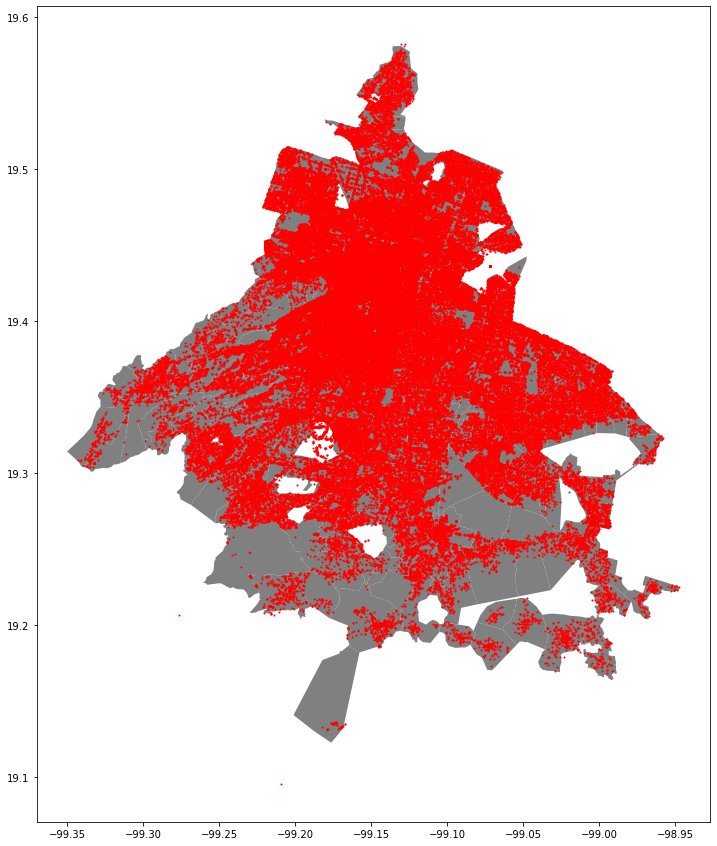

In [21]:
fig, ax = plt.subplots(figsize= (15,15))
cuadrantes.plot(ax = ax, color="grey")
geo_df[geo_df['fecha_hechos'].dt.year == 2016].plot(ax = ax, color="red", markersize=1, label="2016")

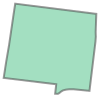

In [22]:
cuadrantes.loc[5, 'geometry']

In [186]:
cuadrante_0 = cuadrantes.loc[0, 'geometry']

In [219]:
carpeta_0 = geo_df.loc[0,'geometry']
carpeta_1 = geo_df.loc[563,'geometry']

In [191]:
carpeta_0.within(cuadrante_0)

False

In [211]:
cuadrantes_geom = cuadrantes['geometry']

In [220]:
for c in cuadrantes_geom:
    try:
        if carpeta_1.within(c):
            resp = c
    except ValueError:
        continue

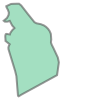

In [221]:
resp

In [25]:
cuadrantes_df = cuadrantes

In [26]:
cuadrantes_df['cantidad_carpetas_2016'] = 0
cuadrantes_df['cantidad_carpetas_2017'] = 0
cuadrantes_df['cantidad_carpetas_2018'] = 0

In [27]:
cuadrantes_df['cantidad_carpetas_2019'] = 0

In [28]:
s = geo_df['geometry'].within(cuadrante_0)

NameError: name 'cuadrante_0' is not defined

In [29]:
#cuadrantes_df['cantidad_carpetas_2016'] = geo_df[geo_df['año_hechos'] == 2016]['geometry'].within()

In [30]:
cuadrantes_df.head()

,nomenclatu,cve_zona,deleg,no_region,no_cuadran,zona,cve_sector,sector,x,y,geometry,cantidad_carpetas_2016,cantidad_carpetas_2017,cantidad_carpetas_2018,cantidad_carpetas_2019
0,N-1.2.2,N,GUSTAVO A MADERO,1.0,2.0,NORTE,2,CUAUTEPEC,-99.137705,19.565990,"POLYGON ((-99.1311281738739 19.57075324294661,...",0,0,0,0
1,C-1.4.17,C,CUAUHTEMOC,1.0,17.0,CENTRO,4,BUENAVISTA,-99.141425,19.440934,"POLYGON ((-99.14379617387391 19.4399732429466,...",0,0,0,0
2,N-1.2.9,N,GUSTAVO A MADERO,1.0,9.0,NORTE,2,CUAUTEPEC,-99.132634,19.556968,POLYGON ((-99.13642417387391 19.55785624294661...,0,0,0,0
3,C-1.2.15,C,CUAUHTEMOC,1.0,15.0,CENTRO,2,ANGEL,-99.166388,19.429223,POLYGON ((-99.16978917387389 19.43100624294661...,0,0,0,0
4,N-3.2.5,N,VENUSTIANO CARRANZA,3.0,5.0,NORTE,2,CONGRESO,-99.114289,19.429374,"POLYGON ((-99.1196181738739 19.42769624294661,...",0,0,0,0


In [272]:
geo_df[geo_df['año_hechos'] == 2016]['geometry'].within(cuadrante_0).sum()

132

In [273]:
geo_df[geo_df['año_hechos'] == 2017]['geometry'].within(cuadrante_0).sum()

136

In [274]:
geo_df[geo_df['año_hechos'] == 2018]['geometry'].within(cuadrante_0).sum()

160

In [275]:
geo_df[geo_df['año_hechos'] == 2019]['geometry'].within(cuadrante_0).sum()

75

In [276]:
geo_df['geometry'].within(cuadrante_0).sum()

503

In [277]:
132 + 136 + 160 + 75

503

In [280]:
cuadrantes_df.loc[0, 'cantidad_carpetas_2016']

0

In [283]:
cuadrantes_df.loc[0, 'cantidad_carpetas_2016'] = 0

In [301]:
for i in range(0,10):
    cuadrantes_df.loc[i, 'cantidad_carpetas_2016'] = geo_df[geo_df['año_hechos'] == 2016]['geometry'].within(cuadrantes_df.loc[i, 'geometry']).sum()
    
    

In [302]:
cuadrantes_df

,nomenclatu,cve_zona,deleg,no_region,no_cuadran,zona,cve_sector,sector,x,y,geometry,cantidad_carpetas_2016,cantidad_carpetas_2017,cantidad_carpetas_2018,cantidad_carpetas_2019
0,N-1.2.2,N,GUSTAVO A MADERO,1.0,2.0,NORTE,2,CUAUTEPEC,-99.137705,19.565990,"POLYGON ((-99.1311281738739 19.57075324294661,...",132,0,0,0
1,C-1.4.17,C,CUAUHTEMOC,1.0,17.0,CENTRO,4,BUENAVISTA,-99.141425,19.440934,"POLYGON ((-99.14379617387391 19.4399732429466,...",106,0,0,0
2,N-1.2.9,N,GUSTAVO A MADERO,1.0,9.0,NORTE,2,CUAUTEPEC,-99.132634,19.556968,POLYGON ((-99.13642417387391 19.55785624294661...,37,0,0,0
3,C-1.2.15,C,CUAUHTEMOC,1.0,15.0,CENTRO,2,ANGEL,-99.166388,19.429223,POLYGON ((-99.16978917387389 19.43100624294661...,170,0,0,0
4,N-3.2.5,N,VENUSTIANO CARRANZA,3.0,5.0,NORTE,2,CONGRESO,-99.114289,19.429374,"POLYGON ((-99.1196181738739 19.42769624294661,...",174,0,0,0
5,N-3.2.2,N,VENUSTIANO CARRANZA,3.0,2.0,NORTE,2,CONGRESO,-99.121747,19.431031,"POLYGON ((-99.1189771738739 19.43402824294661,...",253,0,0,0
6,N-3.2.3,N,VENUSTIANO CARRANZA,3.0,3.0,NORTE,2,CONGRESO,-99.121054,19.437625,"POLYGON ((-99.1189771738739 19.43402824294661,...",211,0,0,0
7,C-1.2.12,C,CUAUHTEMOC,1.0,12.0,CENTRO,2,ANGEL,-99.173683,19.422106,POLYGON ((-99.17165917387391 19.42512724294661...,128,0,0,0
8,C-1.7.2,C,CUAUHTEMOC,1.0,2.0,CENTRO,7,ROMA,-99.169690,19.407933,"POLYGON ((-99.1723981738739 19.41148624294661,...",299,0,0,0
9,C-1.1.1,C,CUAUHTEMOC,1.0,1.0,CENTRO,1,ALAMEDA,-99.144826,19.435127,POLYGON ((-99.14053717387391 19.43616524294661...,1210,0,0,0


In [288]:
cuadrantes_df['cantidad_carpetas_2016'] = geo_df[geo_df['año_hechos'] == 2016]['geometry'].within(cuadrantes_df['geometry']).sum()
    
    

In [317]:
len(cuadrantes_df)

847

In [314]:
len_2016 = len(geo_df[geo_df['año_hechos'] == 2016])
len_2017 = len(geo_df[geo_df['año_hechos'] == 2017])
len_2018 = len(geo_df[geo_df['año_hechos'] == 2018])
len_2019 = len(geo_df[geo_df['año_hechos'] == 2019])
print("carpetas 2016:",len_2016)
print("carpetas 2017:",len_2017)
print("carpetas 2018:",len_2018)
print("carpetas 2019:",len_2019)
print("-"*50)
print("sum ->", len_2016 + len_2017+ len_2018 + len_2019)
print("total ds:,", len(geo_df))

carpetas 2016: 194007
carpetas 2017: 225329
carpetas 2018: 248953
carpetas 2019: 93846
--------------------------------------------------
sum -> 762135
total ds:, 762135


In [318]:
carpetas_2016_geodf = geo_df[geo_df['año_hechos'] == 2016]

In [320]:
len(carpetas_2016_geodf)

194007

In [37]:
carpetas_investigacion.groupby('categoria_delito').agg('count')

,año_hechos,mes_hechos,fecha_hechos,delito,colonia_hechos,alcaldia_hechos,longitud,latitud,Geopoint,mes_num,geometry
categoria_delito,,,,,,,,,,,
DELITO DE BAJO IMPACTO,595965,595965,595965,595965,578882,595513,579533,579533,579533,595965,595965
HECHO NO DELICTIVO,48997,48997,48997,48997,43786,48746,43884,43884,43884,48997,48997
HOMICIDIO DOLOSO,4348,4348,4348,4348,3687,4317,3689,3689,3689,4348,4348
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,6709,6709,6709,6709,2999,6677,3000,3000,3000,6709,6709
ROBO A CASA HABITACIÓN CON VIOLENCIA,1774,1774,1774,1774,1768,1774,1768,1768,1768,1774,1774
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,1348,1348,1348,1348,1335,1346,1335,1335,1335,1348,1348
ROBO A NEGOCIO CON VIOLENCIA,10976,10976,10976,10976,10932,10976,10934,10934,10934,10976,10976
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,2763,2763,2763,2763,2711,2763,2711,2711,2711,2763,2763
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,706,706,706,706,692,706,692,692,692,706,706


In [38]:
carpetas_investigacion['categoria_delito'].value_counts()

DELITO DE BAJO IMPACTO                                     595965
HECHO NO DELICTIVO                                          48997
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        41359
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        32153
ROBO A NEGOCIO CON VIOLENCIA                                10976
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        7079
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                6709
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        5230
HOMICIDIO DOLOSO                                             4348
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      2763
VIOLACIÓN                                                    2207
ROBO A CASA HABITACIÓN CON VIOLENCIA                         1774
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      1348
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 706
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      438
SECUESTRO 

In [43]:
carpetas_investigacion['alcaldia_hechos'].value_counts()

CUAUHTEMOC                          121024
IZTAPALAPA                          114018
GUSTAVO A MADERO                     76121
BENITO JUAREZ                        66267
COYOACAN                             51344
MIGUEL HIDALGO                       50389
ALVARO OBREGON                       49783
VENUSTIANO CARRANZA                  43938
TLALPAN                              43672
AZCAPOTZALCO                         37578
IZTACALCO                            32845
XOCHIMILCO                           23235
TLAHUAC                              17251
LA MAGDALENA CONTRERAS               11383
CUAJIMALPA DE MORELOS                10670
MILPA ALTA                            4893
NEZAHUALCOYOTL                        1239
TLALNEPANTLA DE BAZ                    736
ECATEPEC DE MORELOS                    674
NAUCALPAN DE JUAREZ                    536
LA PAZ                                 358
HUIXQUILUCAN                           202
CHIMALHUACAN                           187
CHALCO     

In [48]:
carpetas_investigacion['delito'].value_counts()

VIOLENCIA FAMILIAR                                                      65999
ROBO DE OBJETOS                                                         50280
ROBO A NEGOCIO SIN VIOLENCIA                                            49664
DENUNCIA DE HECHOS                                                      40720
FRAUDE                                                                  37138
AMENAZAS                                                                35705
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA                          28049
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA                              25877
ROBO DE ACCESORIOS DE AUTO                                              24627
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO                             23152
ROBO A CASA HABITACION SIN VIOLENCIA                                    21370
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO    21049
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA           